In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from ensemble_outlier_sample_detection import EnsembleOutlierSampleDetector
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
example_path = 'https://raw.githubusercontent.com/hkaneko1985/ensemble_outlier_sample_detection/0583863a8381dcde5562197e2398d906c313256f/numerical_simulation_data.csv'
df = pd.read_csv(example_path, index_col = 0)
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

明らかにyの一部が変な値になっているデータセットを使用．  
引用元: https://github.com/hkaneko1985/ensemble_outlier_sample_detection

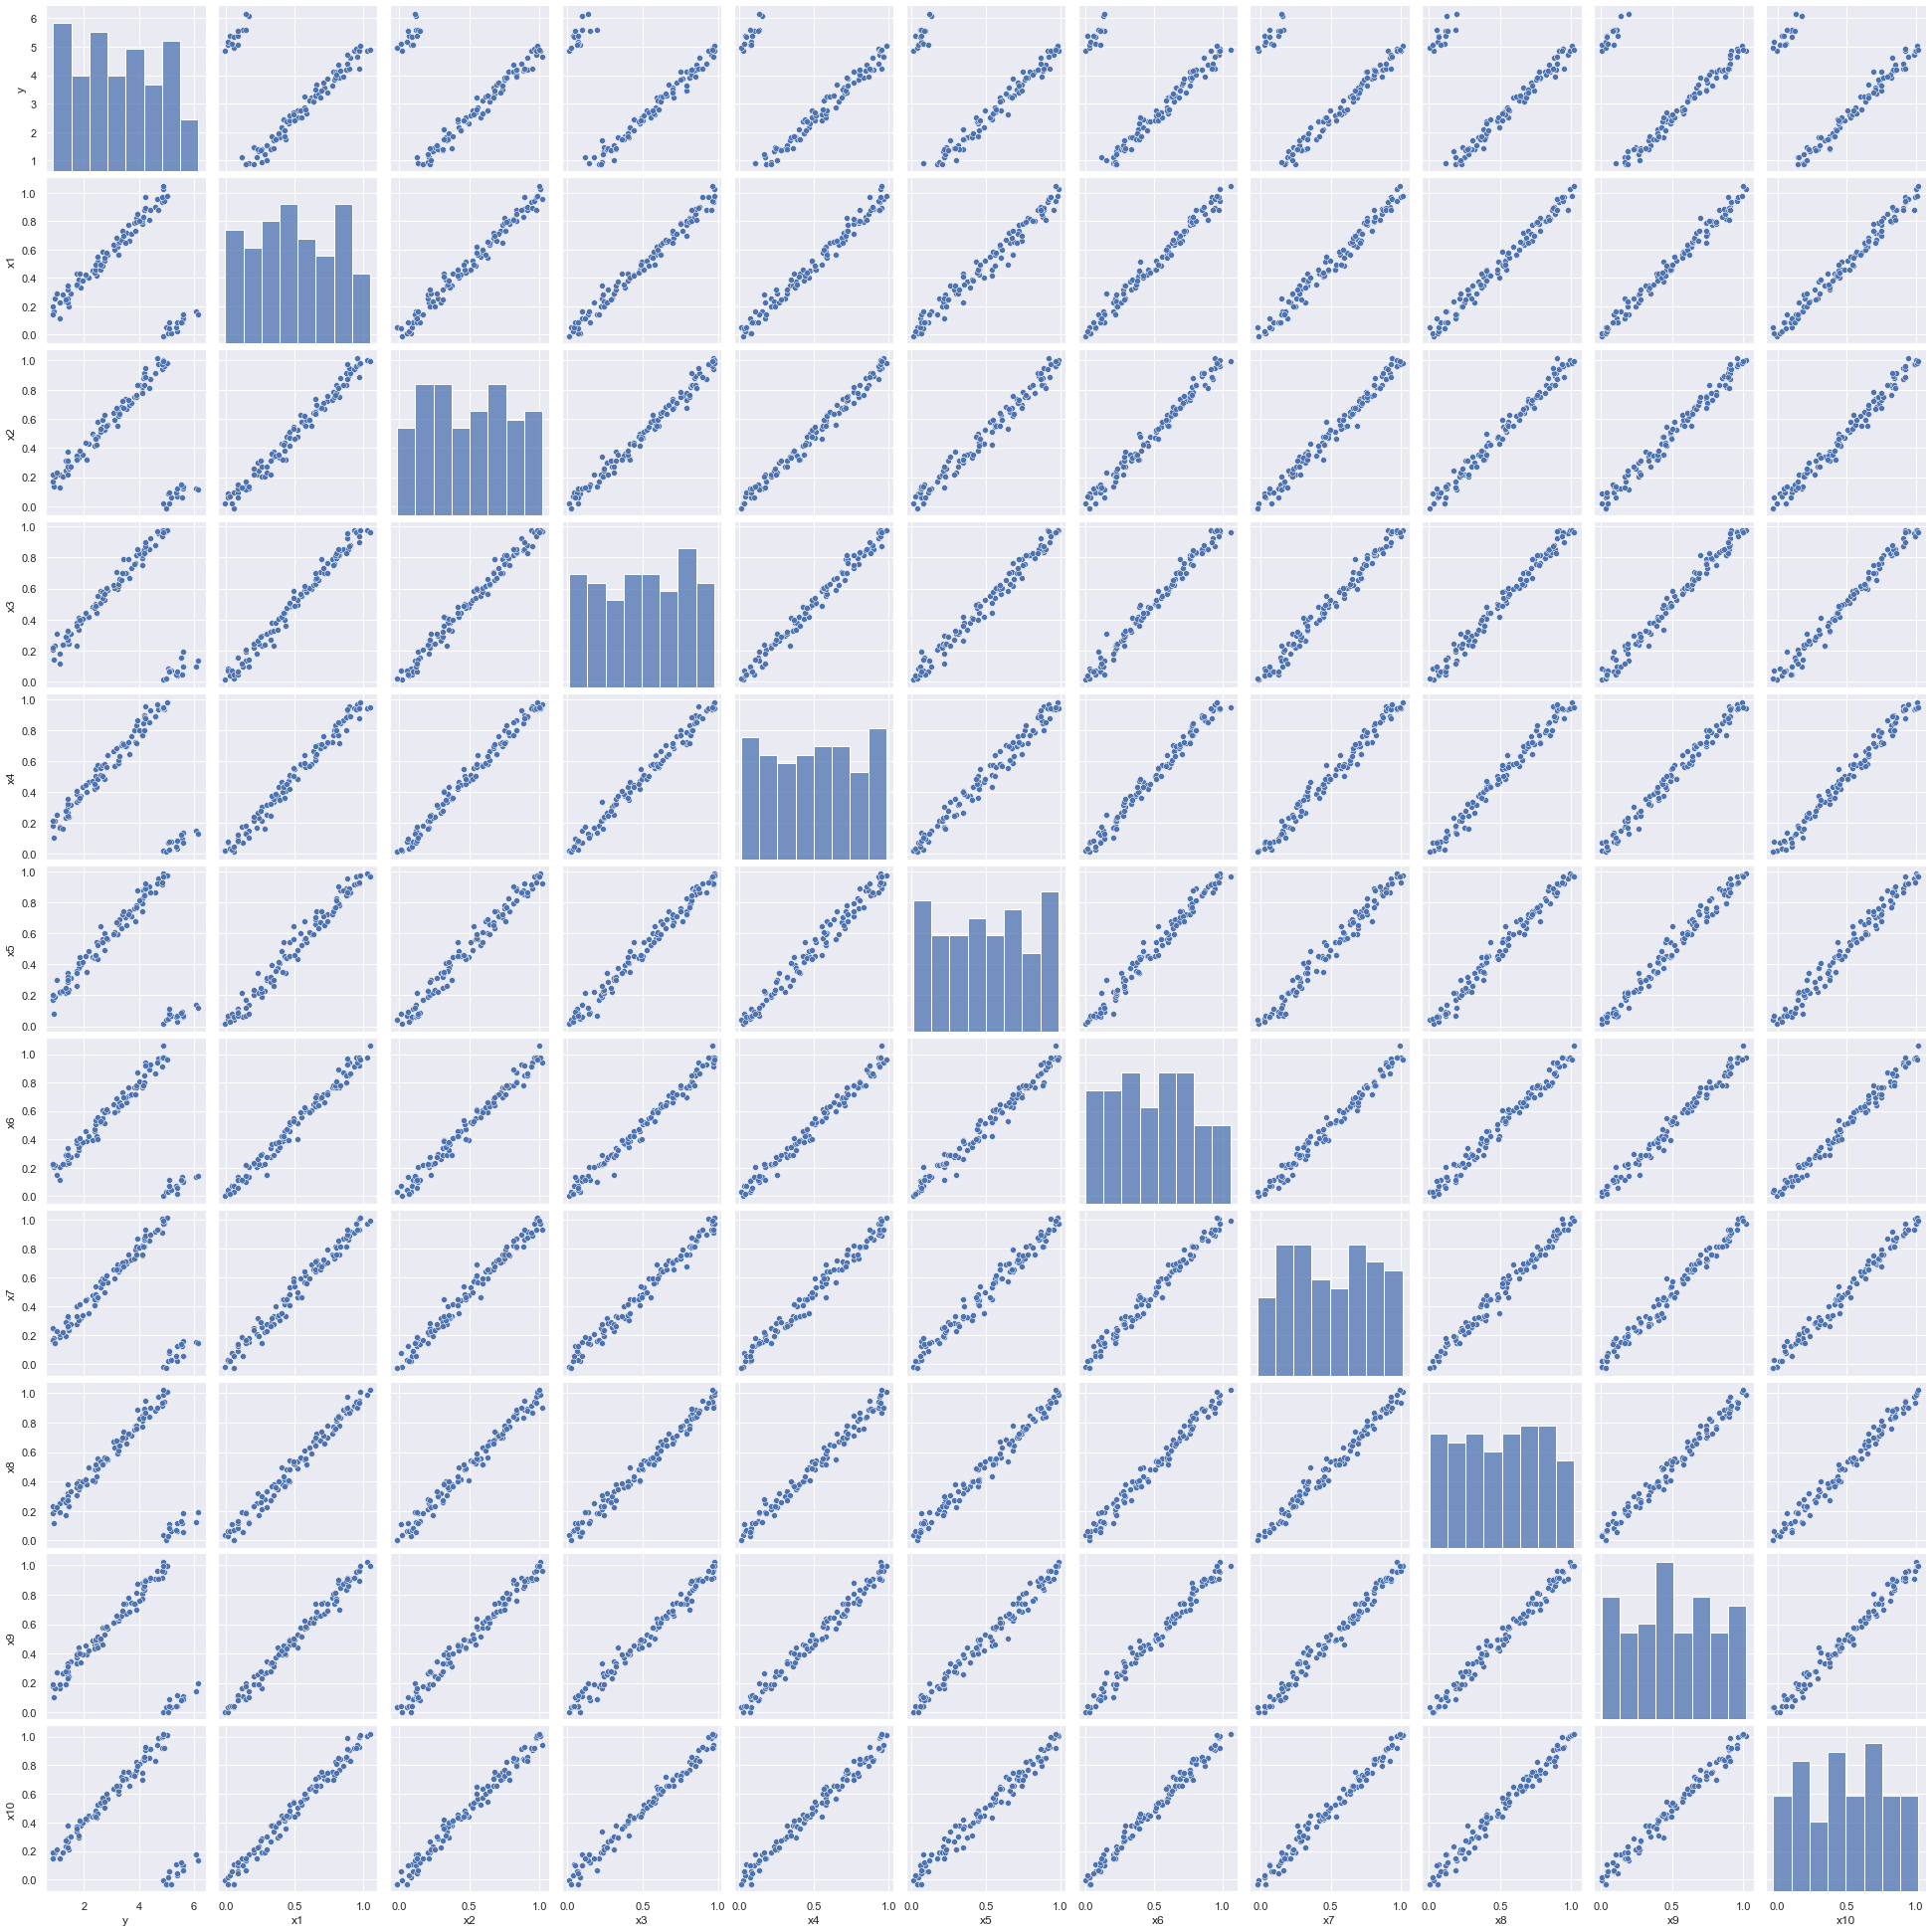

In [4]:
sns.set(style = 'darkgrid')
sns.pairplot(data = df)

In [5]:
elo = EnsembleOutlierSampleDetector(random_state = 334, n_jobs = -1, cv = 2)
elo.fit(X, y)

 17%|█▋        | 500/3000 [02:39<13:16,  3.14it/s]

ValueError: Found array with 0 sample(s) (shape=(0, 10)) while a minimum of 1 is required.

In [11]:
elo.outlier_support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])